In [1]:
import pandas as pd
from nltk import sent_tokenize
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

tqdm.pandas()

In [2]:
df = pd.read_csv("../data/rom_real_dataset_final.csv")

In [3]:
df["n_tokens"] = df.text.str.findall(r"\w+").apply(len)
df["n_types"] = df.text.str.findall(r"\w+").apply(set).apply(len)
df["ttr"] = df["n_types"] / df["n_tokens"]

In [4]:
df_rom = df.query("epoch == 'romantik'")
df_rea = df.query("epoch == 'realismus'")
df_rom.shape, df_rea.shape

((30, 22), (33, 22))

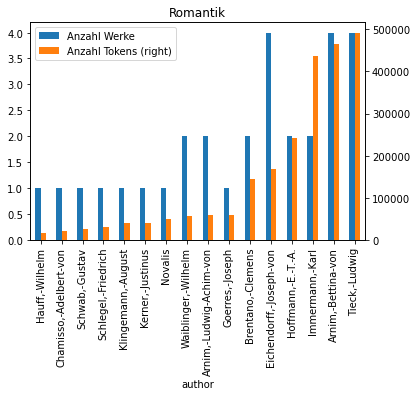

In [5]:
author_plot_df_rom = df_rom.groupby("author")["title"].count().to_frame().merge(
    df_rom.groupby("author")["n_tokens"].sum().to_frame(), on="author"
).sort_values("n_tokens").rename({"n_tokens": "Anzahl Tokens", "title": "Anzahl Werke"}, axis=1)

rom_title_token_plot = author_plot_df_rom.plot(kind='bar', secondary_y='Anzahl Tokens', rot=90)
rom_title_token_plot.set_title("Romantik")
rom_title_token_plot.figure.savefig("../plots/rom_title_token_plot.png", dpi=300, bbox_inches='tight')

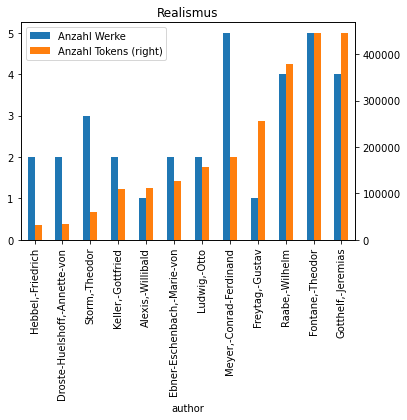

In [6]:
author_plot_df_rea = df_rea.groupby("author")["title"].count().to_frame().merge(
    df_rea.groupby("author")["n_tokens"].sum().to_frame(), on="author"
).sort_values("n_tokens").rename({"n_tokens": "Anzahl Tokens", "title": "Anzahl Werke"}, axis=1)

rea_title_token_plot = author_plot_df_rea.plot(kind='bar', secondary_y='Anzahl Tokens', rot=90)
rea_title_token_plot.set_title("Realismus")
rea_title_token_plot.figure.savefig("../plots/rea_title_token_plot.png", dpi=300, bbox_inches='tight')

In [7]:
plot_df = df.rename({"epoch": "Epoche", "n_tokens": "Anzahl Tokens"}, axis=1)
plot_df

,index,author,author_pnd,author_gender,author_city_of_birth,author_country_of_birth,author_date_of_birth,creation_year,pub_year,pub_place,...,text,normed_text,tagged_text,lemmatized_text,pub_year_estim,decade,n_sents,Anzahl Tokens,n_types,ttr
0,0,"Alexis,-Willibald",118648071,Männlich,Breslau,Polen,1798-06-29 00:00:00,1798-1871,NaN,Berlin,...,1. Kapitel. Die Herbstwäsche\n \n \n \n \n \n ...,1. Kapitel .\nDie Herbstwäsche Erstes Kapitel ...,1 <CARD> . <$.> Kapitel <NN> . <$.> Die <ART> ...,1. kapitel . der herbstwäsche erstes kapitel ....,1846.0,184.0,7443,111549,14035,0.125819
1,2,"Arnim,-Bettina-von",118504185,Weiblich,Frankfurt am Main,Hessen,1785-04-04 00:00:00,1844-1848,1965.0,Frechen,...,Bettina von Arnim\n\n Das Leben der Hochgräfin...,Bettina von Arnim Das Leben der Hochgräfin Gri...,Bettina <NE/B-PER> von <APPR/I-PER> Arnim <NE/...,bettina von arnim der leben der hochgräfin gri...,1846.0,184.0,2811,49809,8318,0.166998
2,3,"Arnim,-Bettina-von",118504185,Weiblich,Frankfurt am Main,Hessen,1785-04-04 00:00:00,1785-1859,1959.0,Frechen,...,Bettina von Arnim\n\n\n Clemens Brentanos\n Fr...,Bettina von Arnim Clemens Brentanos Frühlingsk...,Bettina <NE/B-PER> von <APPR/I-PER> Arnim <NE/...,bettina von arnim clemens brentano frühlingskr...,1844.0,184.0,3608,92151,13492,0.146412
3,4,"Arnim,-Bettina-von",118504185,Weiblich,Frankfurt am Main,Hessen,1785-04-04 00:00:00,1785-1859,1959.0,Frechen,...,Den Studenten\n \n \n \n \n \n \n \nDen Studen...,Den Studenten Den Studenten Die Ihr gleich gol...,Den <ART> Studenten <NN> Den <ART> Studenten <...,der student der student der mein gleichen gold...,1840.0,184.0,4798,148079,17783,0.120091
4,6,"Arnim,-Bettina-von",118504185,Weiblich,Frankfurt am Main,Hessen,1785-04-04 00:00:00,1785-1859,1959.0,Frechen,...,Erster Teil\n \n \n \n \n \n \n \n Vorrede\n \...,Erster Teil Vorrede Vorrede Dies Buch ist für ...,Erster <ADJA> Teil <NN> Vorrede <NN> Vorrede <...,erster teil vorreden vorreden dies buch sein f...,1835.0,183.0,5672,175761,19478,0.110821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,118,"Tieck,-Ludwig",12989432X,Männlich,Berlin,Berlin,1773-05-31 00:00:00,1773-1853,1963.0,München,...,Erstes Buch\n \n \n \n \n \n \n \n Erstes Kapi...,"Erstes Buch Erstes Kapitel Erstes Kapitel "" So...",Erstes <ADJA> Buch <NN> Erstes <ADJA> Kapitel ...,"erstes buch erstes kapitel erstes kapitel "" so...",1798.0,179.0,4338,102729,12877,0.125349
59,119,"Tieck,-Ludwig",12989432X,Männlich,Berlin,Berlin,1773-05-31 00:00:00,1773-1853,1963.0,München,...,Erster Teil\n \n \n \n \n \n \n \n Vorwort\n \...,Erster Teil Vorwort Vorwort Es ist ein bekannt...,Erster <ADJA> Teil <NN> Vorwort <NN> Vorwort <...,erster teil vorwort vorwort ich sein einen bek...,1836.0,183.0,5195,125629,16795,0.133687
60,120,"Tieck,-Ludwig",12989432X,Männlich,Berlin,Berlin,1773-05-31 00:00:00,1773-1853,1963.0,München,...,Erster Teil\n \n \n \n \n \n \n \n Vorwort\n \...,Erster Teil Vorwort Vorwort Schon vor vielen J...,Erster <ADJA> Teil <NN> Vorwort <NN> Vorwort <...,erster teil vorwort vorwort schon vor viel jah...,1840.0,184.0,4627,102168,14435,0.141287
61,121,"Waiblinger,-Wilhelm",11862850X,Männlich,Heilbronn,Baden-Württemberg,1804-11-21 00:00:00,1804-1830,1981.0,Stuttgart,...,Wilhelm Waiblinger\n\n\n Die Briten in Rom\n\n...,Wilhelm Waiblinger Die Briten in Rom Novelle W...,Wilhelm <NE/B-PER> Waiblinger <NE/E-PER> Die <...,wilhelm waiblinger der brite in rom novelle ic...,1828.0,182.0,2298,37959,7222,0.190258


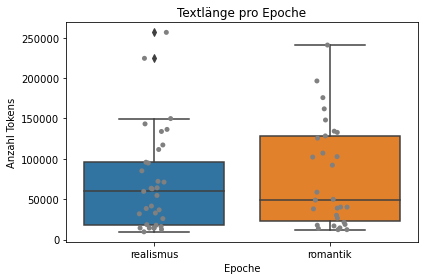

In [8]:
fig, ax = plt.subplots()
sns.boxplot(x="Epoche", y="Anzahl Tokens", ax=ax, data=plot_df)
sns.stripplot(x="Epoche", y="Anzahl Tokens", color="gray", ax=ax, data=plot_df)
ax.set_title("Textlänge pro Epoche")
fig.tight_layout()
fig.savefig("../plots/textlength_per_epoch_box.png", dpi=200)

ValueError: Could not interpret input 'Epoche'

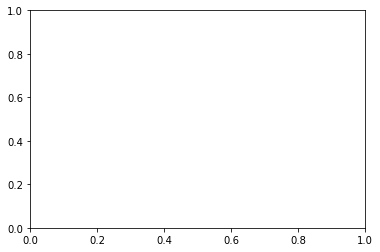

In [9]:
fig, ax = plt.subplots()
sns.barplot(x="Epoche", y="Anzahl Tokens", ax=ax, data=plot_df.groupby("Epoche")["Anzahl Tokens"].sum().to_frame(), axis=1)
ax.set_title("Anzahl Tokens pro Epoche")
fig.tight_layout()
fig.savefig("../plots/textlength_per_epoch_box.png", dpi=200)

In [22]:
stats = pd.DataFrame.from_records([
    {
        "Epoche": "Romantik",
        "Anzahl Werke": len(df_rom),
        "Ø-Textlänge (in 1000 Tokens)": df_rom.n_tokens.mean() / 1000,
        "σ-Textlänge (in 1000 Tokens)": df_rom.n_tokens.std() / 1000,
    },
    {
        "Epoche": "Realismus",
        "Anzahl Werke": len(df_rea),
        "Ø-Textlänge (in 1000 Tokens)": df_rea.n_tokens.mean() / 1000,
        "σ-Textlänge (in 1000 Tokens)": df_rea.n_tokens.std() / 1000,
    },
])
stats = stats.round(2)
print(stats.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &     Epoche &  Anzahl Werke &  Ø-Textlänge (in 1000 Tokens) &  σ-Textlänge (in 1000 Tokens) \\
\midrule
0 &   Romantik &            30 &                         78.22 &                         64.09 \\
1 &  Realismus &            33 &                         70.78 &                         61.28 \\
\bottomrule
\end{tabular}

